In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Importing Dataset**

In [4]:
# Load dataset
df = pd.read_csv("/Users/smritilimbu/Desktop/Machine-learning/cleandf/train.csv")

/var/folders/b0/szwrg9r90316rgpzb31_06940000gn/T/ipykernel_2096/1772214685.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/smritilimbu/Desktop/Machine-learning/cleandf/train.csv")


In [5]:
# Display the first few rows
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
# Basic information about the dataset/ datatypes/ counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**Statistics**

In [7]:
# Summary statistics
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [8]:
##Studying the data
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [9]:
#Dropping unecessary columns since these columns will not help in ML
columns_to_drop = ['ID','SSN', 'Customer_ID' , 'Month', 'Name', 'Type_of_Loan', 'Occupation']
df = df.drop(columns_to_drop , axis=1 )

In [10]:
#Display dataframe to explore dataset after dropping columns
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,19114.12,NaN,3,4,3,4,3,7,_,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,19114.12,NaN,3,4,3,4,5,4,6.27,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [11]:
# Check for missing values
df.isnull().sum()

Age                             0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [12]:
# Drop rows with missing values
df = df.dropna()

In [13]:
#Checking the datatypes
df.dtypes

Age                          object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

**Diving Data into 2 sections##**
##

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66548 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       66548 non-null  object 
 1   Annual_Income             66548 non-null  object 
 2   Monthly_Inhand_Salary     66548 non-null  float64
 3   Num_Bank_Accounts         66548 non-null  int64  
 4   Num_Credit_Card           66548 non-null  int64  
 5   Interest_Rate             66548 non-null  int64  
 6   Num_of_Loan               66548 non-null  object 
 7   Delay_from_due_date       66548 non-null  int64  
 8   Num_of_Delayed_Payment    66548 non-null  object 
 9   Changed_Credit_Limit      66548 non-null  object 
 10  Num_Credit_Inquiries      66548 non-null  float64
 11  Credit_Mix                66548 non-null  object 
 12  Outstanding_Debt          66548 non-null  object 
 13  Credit_Utilization_Ratio  66548 non-null  float64
 14  Credit_Hist

**Changing Datatypes to Int or Float**

In [15]:
# Remove underscore / non-numeric characters from the values in the column
# Convert the columns to integer or float


df['Credit_Mix'] = df['Credit_Mix'].replace('_')
#df['Payment_Behaviour'] = pd.to_numeric(df['Payment_Behaviour'], errors='coerce', downcast='integer')
#df['Payment_of_Min_Amount'] = pd.to_numeric(df['Payment_of_Min_Amount'], errors='coerce', downcast='integer')

df['Age'] = df['Age'].replace('_', '')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce', downcast='integer')

df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].abs()

df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Num_of_Loan'] = df['Num_of_Loan'].abs()

df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].abs()

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace("_", "")
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

df['Num_of_Loan'] = df['Num_of_Loan'].replace('_', '')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce', downcast='integer')

df['Annual_Income'] = df['Annual_Income'].astype(str)
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce', downcast='integer')

df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce', downcast='integer')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')


In [16]:
df_copy = df

In [17]:
# Checking datatypes after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66548 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       63241 non-null  float64
 1   Annual_Income             66548 non-null  float64
 2   Monthly_Inhand_Salary     66548 non-null  float64
 3   Num_Bank_Accounts         66548 non-null  int64  
 4   Num_Credit_Card           66548 non-null  int64  
 5   Interest_Rate             66548 non-null  int64  
 6   Num_of_Loan               63397 non-null  float64
 7   Delay_from_due_date       66548 non-null  int64  
 8   Num_of_Delayed_Payment    64609 non-null  float64
 9   Changed_Credit_Limit      65143 non-null  float64
 10  Num_Credit_Inquiries      66548 non-null  float64
 11  Credit_Mix                66548 non-null  object 
 12  Outstanding_Debt          65869 non-null  float64
 13  Credit_Utilization_Ratio  66548 non-null  float64
 14  Credit_Hist

In [18]:
#Converting Credit_History_Age into integer value in months

def convert_to_months(value):
    if pd.isnull(value):
        return np.nan

    if isinstance(value, str):
        parts = value.split()
        years = int(parts[0])
        months = int(parts[3])
    
        total_months = years * 12 + months
        return total_months
    else:
        return np.nan  
    
df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_to_months)

df['Credit_History_Age'] 

0        265
6        271
8        319
9        320
10       321
        ... 
99994    377
99995    378
99996    379
99997    380
99999    382
Name: Credit_History_Age, Length: 66548, dtype: int64

In [19]:
##Handling Non-numeric columns
Catergorical_columns = ['Credit_Mix', 'Credit_Score', 'Payment_of_Min_Amount', 'Payment_Behaviour']

In [20]:
df[Catergorical_columns]

,Credit_Mix,Credit_Score,Payment_of_Min_Amount,Payment_Behaviour
0,_,Good,No,High_spent_Small_value_payments
6,Good,Good,No,Low_spent_Small_value_payments
8,Good,Standard,No,Low_spent_Small_value_payments
9,Good,Good,No,High_spent_Large_value_payments
10,Good,Standard,No,High_spent_Large_value_payments
...,...,...,...,...
99994,Bad,Poor,No,High_spent_Medium_value_payments
99995,Bad,Poor,No,High_spent_Large_value_payments
99996,Bad,Poor,No,High_spent_Medium_value_payments
99997,Good,Poor,No,High_spent_Large_value_payments


In [21]:
#Encoding 'Credit_Score' column
le = LabelEncoder()

df['Credit_Score'] = le.fit_transform(df['Credit_Score'])

le.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [22]:
#Encoding data
df['Credit_Mix'] = le.fit_transform(df['Credit_Mix'])

le.classes_

array(['Bad', 'Good', 'Standard', '_'], dtype=object)

In [23]:
#Displaying encodeed columns
df[Catergorical_columns]

,Credit_Mix,Credit_Score,Payment_of_Min_Amount,Payment_Behaviour
0,3,0,No,High_spent_Small_value_payments
6,1,0,No,Low_spent_Small_value_payments
8,1,2,No,Low_spent_Small_value_payments
9,1,0,No,High_spent_Large_value_payments
10,1,2,No,High_spent_Large_value_payments
...,...,...,...,...
99994,0,1,No,High_spent_Medium_value_payments
99995,0,1,No,High_spent_Large_value_payments
99996,0,1,No,High_spent_Medium_value_payments
99997,1,1,No,High_spent_Large_value_payments


In [24]:
mapping = {'Yes': 1, 'No': 0}

# Encode 'Yes' and 'No' into numbers in the 'Payment_of_Min_Amount' column
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(mapping)

In [25]:
df['Payment_Behaviour']

0         High_spent_Small_value_payments
6          Low_spent_Small_value_payments
8          Low_spent_Small_value_payments
9         High_spent_Large_value_payments
10        High_spent_Large_value_payments
                       ...               
99994    High_spent_Medium_value_payments
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99999                              !@9#%8
Name: Payment_Behaviour, Length: 66548, dtype: object

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df['Payment_Behaviour'].values.reshape(-1, 1))
encoded_data_train = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Payment_Behaviour']))
df = df.reset_index(drop=True) # Resetting the index to avoid issues while concatenating
df= pd.concat([df, encoded_data_train], axis=1)

In [27]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments'],
      dtype='object')

In [28]:
df['Payment_Behaviour']

0         High_spent_Small_value_payments
1          Low_spent_Small_value_payments
2          Low_spent_Small_value_payments
3         High_spent_Large_value_payments
4         High_spent_Large_value_payments
                       ...               
66543    High_spent_Medium_value_payments
66544     High_spent_Large_value_payments
66545    High_spent_Medium_value_payments
66546     High_spent_Large_value_payments
66547                              !@9#%8
Name: Payment_Behaviour, Length: 66548, dtype: object

In [29]:
df['Payment_of_Min_Amount']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
66543    0.0
66544    0.0
66545    0.0
66546    0.0
66547    0.0
Name: Payment_of_Min_Amount, Length: 66548, dtype: float64

In [30]:
# Displaying encoded dataframe
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,80.415295,High_spent_Small_value_payments,312.494089,0,0.0,0.0,1.0,0.0,0.0,0.0
1,23.0,19114.12,1824.843333,3,4,3,4.0,3,NaN,11.27,...,178.344067,Low_spent_Small_value_payments,244.565317,0,0.0,0.0,0.0,0.0,0.0,1.0
2,NaN,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,...,104.291825,Low_spent_Small_value_payments,470.690627,2,0.0,0.0,0.0,0.0,0.0,1.0
3,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,...,40.391238,High_spent_Large_value_payments,484.591214,0,1.0,0.0,0.0,0.0,0.0,0.0
4,28.0,34847.84,3037.986667,2,1385,6,1.0,3,1.0,5.42,...,58.515976,High_spent_Large_value_payments,466.466476,2,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66543,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,...,140.581403,High_spent_Medium_value_payments,410.256158,1,0.0,1.0,0.0,0.0,0.0,0.0
66544,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,...,60.971333,High_spent_Large_value_payments,479.866228,1,1.0,0.0,0.0,0.0,0.0,0.0
66545,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,...,54.185950,High_spent_Medium_value_payments,496.651610,1,0.0,1.0,0.0,0.0,0.0,0.0
66546,25.0,39628.99,3359.415833,4,6,5729,2.0,27,6.0,11.50,...,24.028477,High_spent_Large_value_payments,516.809083,1,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#Displaying dataframe converted into numerical
df.head(25)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,...,80.415295,High_spent_Small_value_payments,312.494089,0,0.0,0.0,1.0,0.0,0.0,0.0
1,23.0,19114.12,1824.843333,3,4,3,4.0,3,NaN,11.27,...,178.344067,Low_spent_Small_value_payments,244.565317,0,0.0,0.0,0.0,0.0,0.0,1.0
2,NaN,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,...,104.291825,Low_spent_Small_value_payments,470.690627,2,0.0,0.0,0.0,0.0,0.0,1.0
3,28.0,34847.84,3037.986667,2,4,6,1.0,7,1.0,7.42,...,40.391238,High_spent_Large_value_payments,484.591214,0,1.0,0.0,0.0,0.0,0.0,0.0
4,28.0,34847.84,3037.986667,2,1385,6,1.0,3,1.0,5.42,...,58.515976,High_spent_Large_value_payments,466.466476,2,1.0,0.0,0.0,0.0,0.0,0.0
5,28.0,34847.84,3037.986667,2,4,6,1.0,3,1.0,6.42,...,130.115420,Low_spent_Small_value_payments,444.867032,0,0.0,0.0,0.0,0.0,0.0,1.0
6,28.0,34847.84,3037.986667,2,4,6,1.0,3,0.0,5.42,...,43.477190,High_spent_Large_value_payments,481.505262,0,1.0,0.0,0.0,0.0,0.0,0.0
7,28.0,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,...,218.904344,Low_spent_Small_value_payments,356.078109,0,0.0,0.0,0.0,0.0,0.0,1.0
8,34.0,143162.64,12187.220000,1,5,8,3.0,5,8.0,7.10,...,168.413703,!@9#%8,1043.315978,0,0.0,0.0,0.0,0.0,0.0,0.0
9,34.0,143162.64,12187.220000,1,5,8,3.0,13,6.0,7.10,...,232.860384,High_spent_Small_value_payments,998.869297,0,0.0,0.0,1.0,0.0,0.0,0.0


In [32]:
# Dropping 'Payment Behaviour' column since we already encoded it
df = df.drop(['Payment_Behaviour'], axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66548 entries, 0 to 66547
Data columns (total 26 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 63241 non-null  float64
 1   Annual_Income                                       66548 non-null  float64
 2   Monthly_Inhand_Salary                               66548 non-null  float64
 3   Num_Bank_Accounts                                   66548 non-null  int64  
 4   Num_Credit_Card                                     66548 non-null  int64  
 5   Interest_Rate                                       66548 non-null  int64  
 6   Num_of_Loan                                         63397 non-null  float64
 7   Delay_from_due_date                                 66548 non-null  int64  
 8   Num_of_Delayed_Payment                              64609 non-null  float64


Checking Dataset Balance

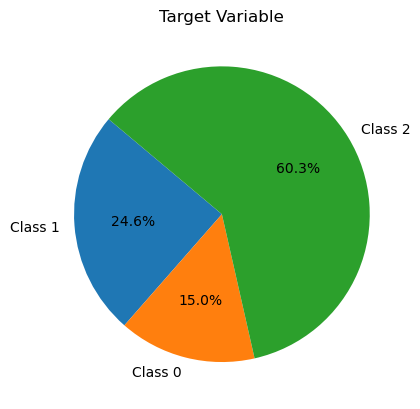

In [34]:
# Checking if the Tagert Columns is balanced :
arr_0, arr_1, arr_2 = [], [], []
for i in df['Credit_Score']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)
        
Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable')
plt.show()


Plotting the pie chart post oversampling

In [35]:
##Balancing Target Column
data_class_1 = df[df['Credit_Score'] == 1]
data_class_2 = df[df['Credit_Score'] == 2]
data_class_0 = df[df['Credit_Score'] == 0]

data_class_1_oversampled = data_class_1.sample(Class_2, replace=True)
data_class_0_oversampled = data_class_0.sample(Class_2, replace=True)


data_oversampled = pd.concat([data_class_2, data_class_1_oversampled], axis=0)
data_oversampled = pd.concat([data_oversampled, data_class_0_oversampled], axis=0)

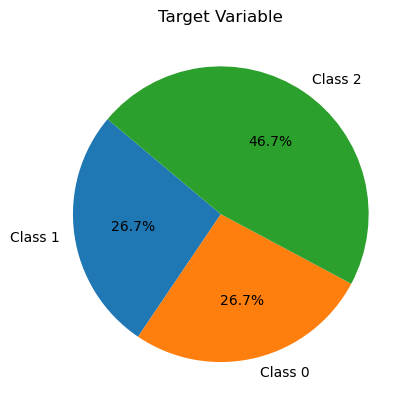

In [36]:
# 'Credit_Score' column in balanced now and ia ready for ML model
arr_0, arr_1, arr_2 = [], [], []
for i in data_oversampled['Credit_Score']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)
        
Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable')
plt.show()


Feature Analysis

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

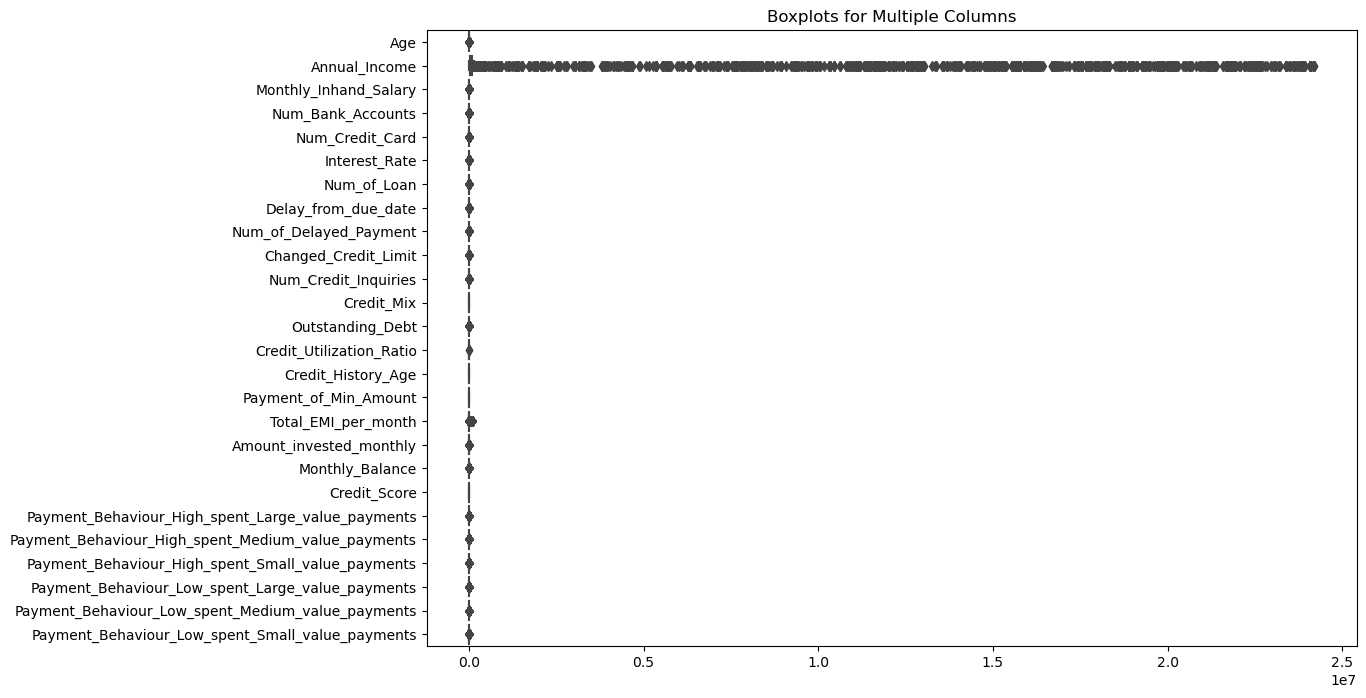

In [37]:
# Use Seaborn to create boxplots for all columns in df
plt.figure(figsize=(12, 8))  
sns.boxplot(data=data_oversampled, orient='h') 
plt.title('Boxplots for Multiple Columns')

In [42]:
df = data_oversampled.drop('Credit_Score', axis = 1)

Outlier Removal

Checking the skewness of the feature distributions

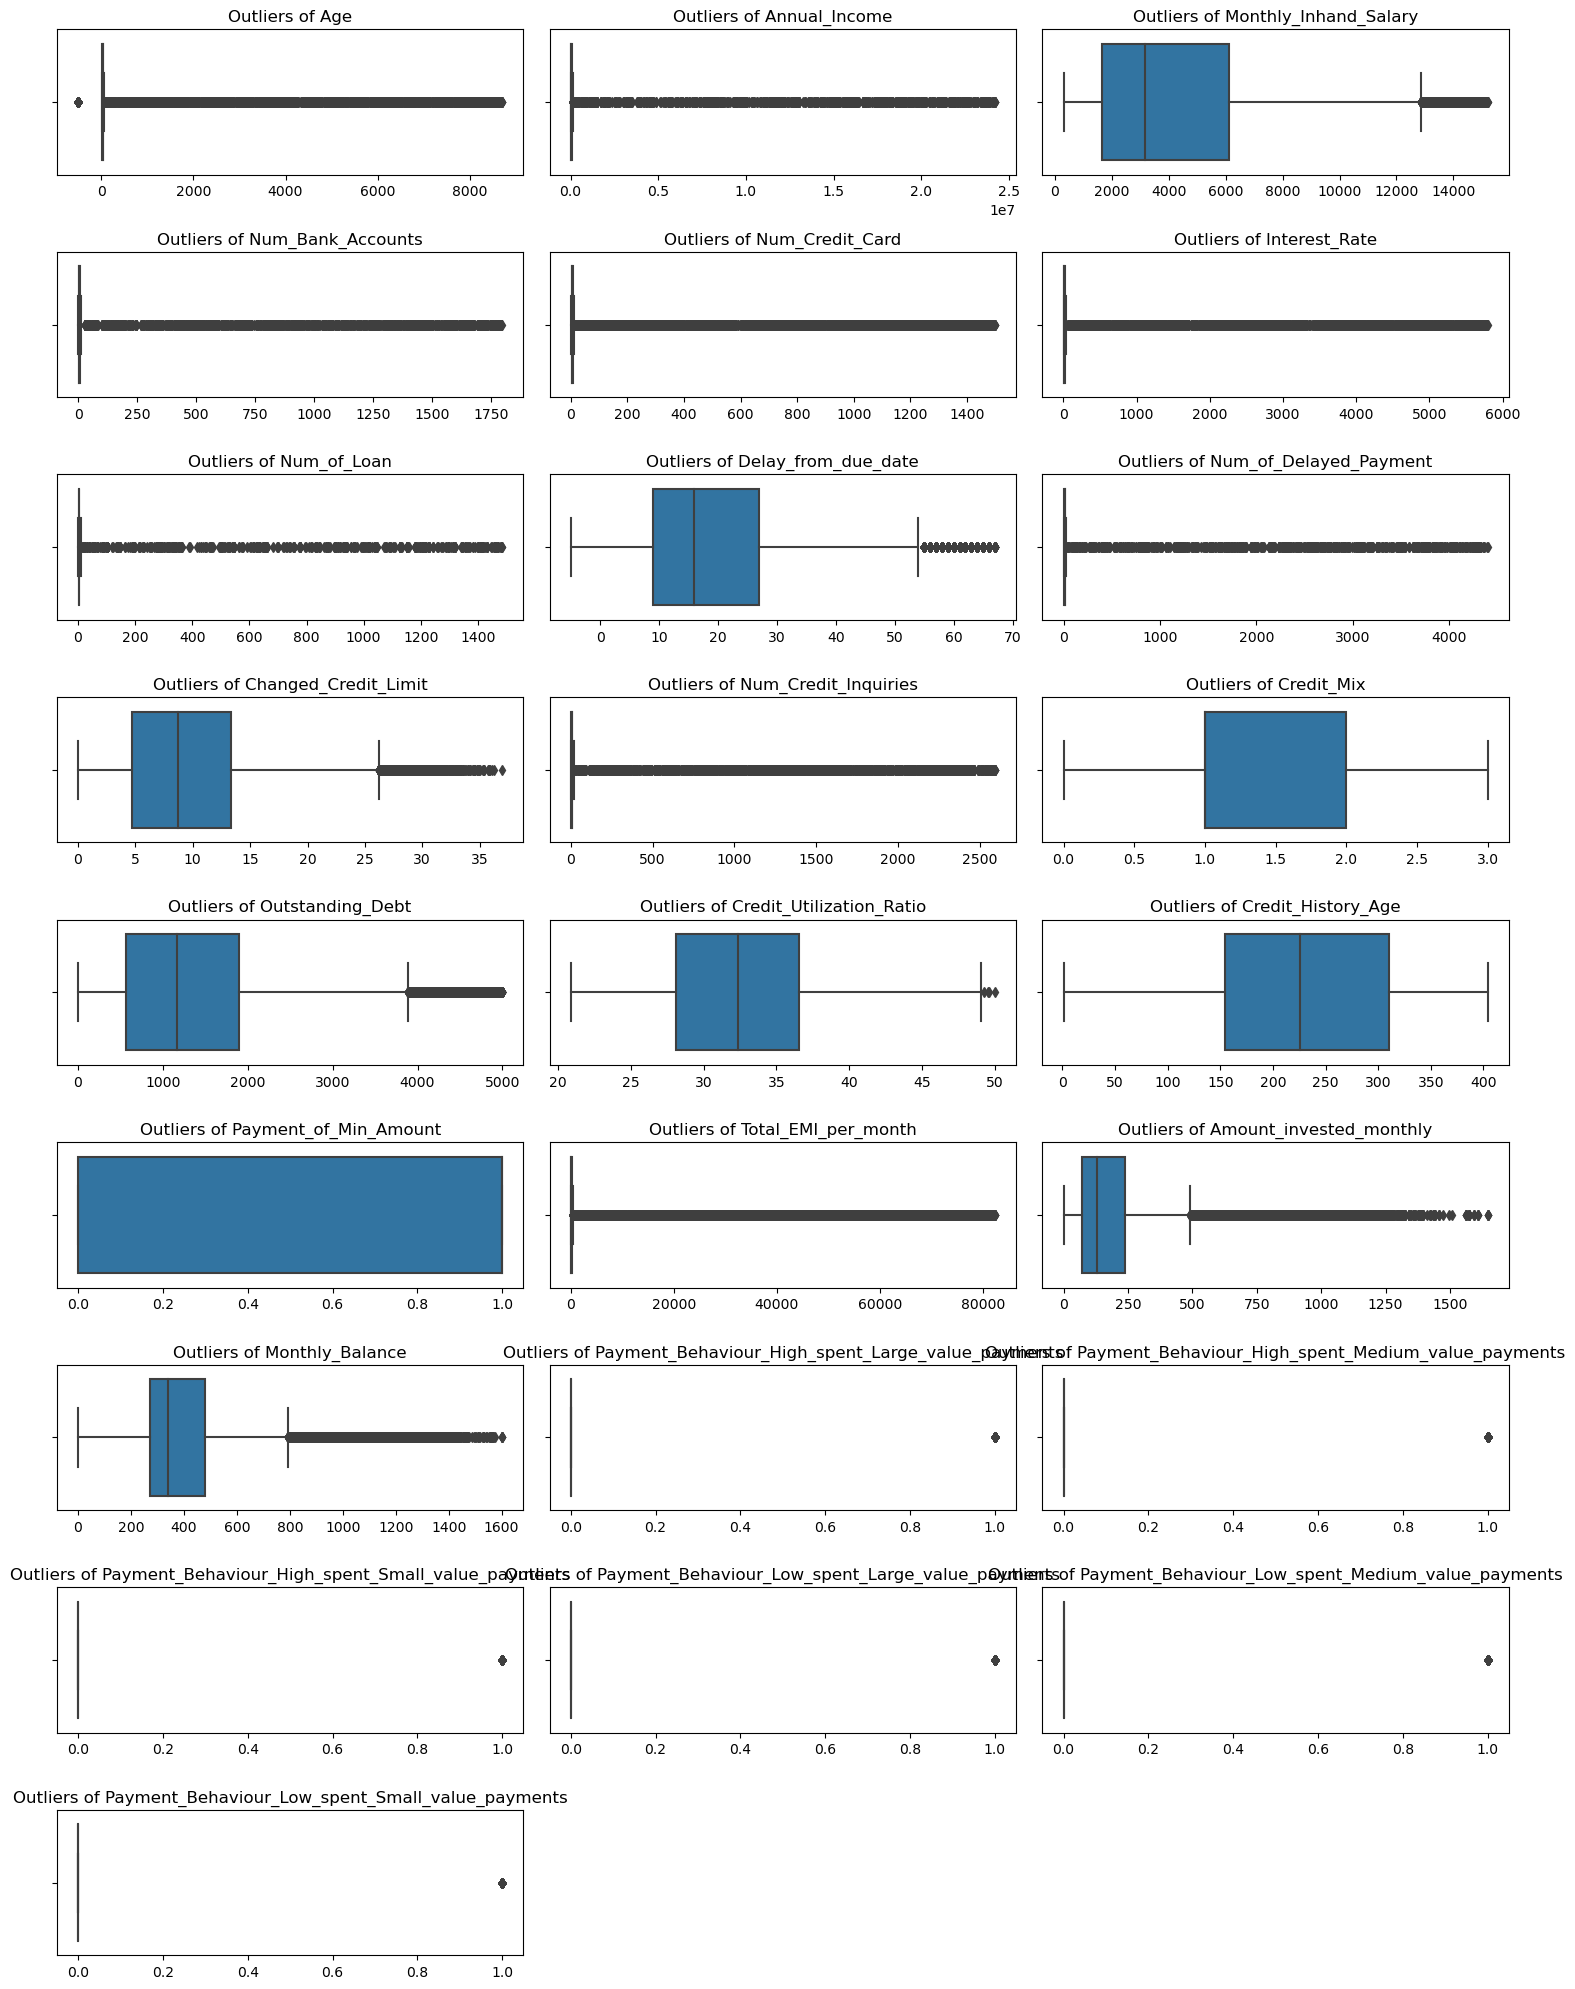

In [43]:
# create a grid of boxplots for each feature in DataFrame
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flattenning the axes
axes = axes.ravel()

i = -1
for feature in df.columns:
    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Outliers of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
#     i += 1
    
#     ax = axes[i]
#     df[feature] = yeojohnson(df[feature])[0]
#     sns.histplot(df[feature], kde=True, ax=ax) 
#     ax.set_title(f'Distribution of Transformed {feature}')
#     ax.set_xlabel('')
#     ax.set_ylabel('')
    
for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

Duplicate index labels found. Resetting index.


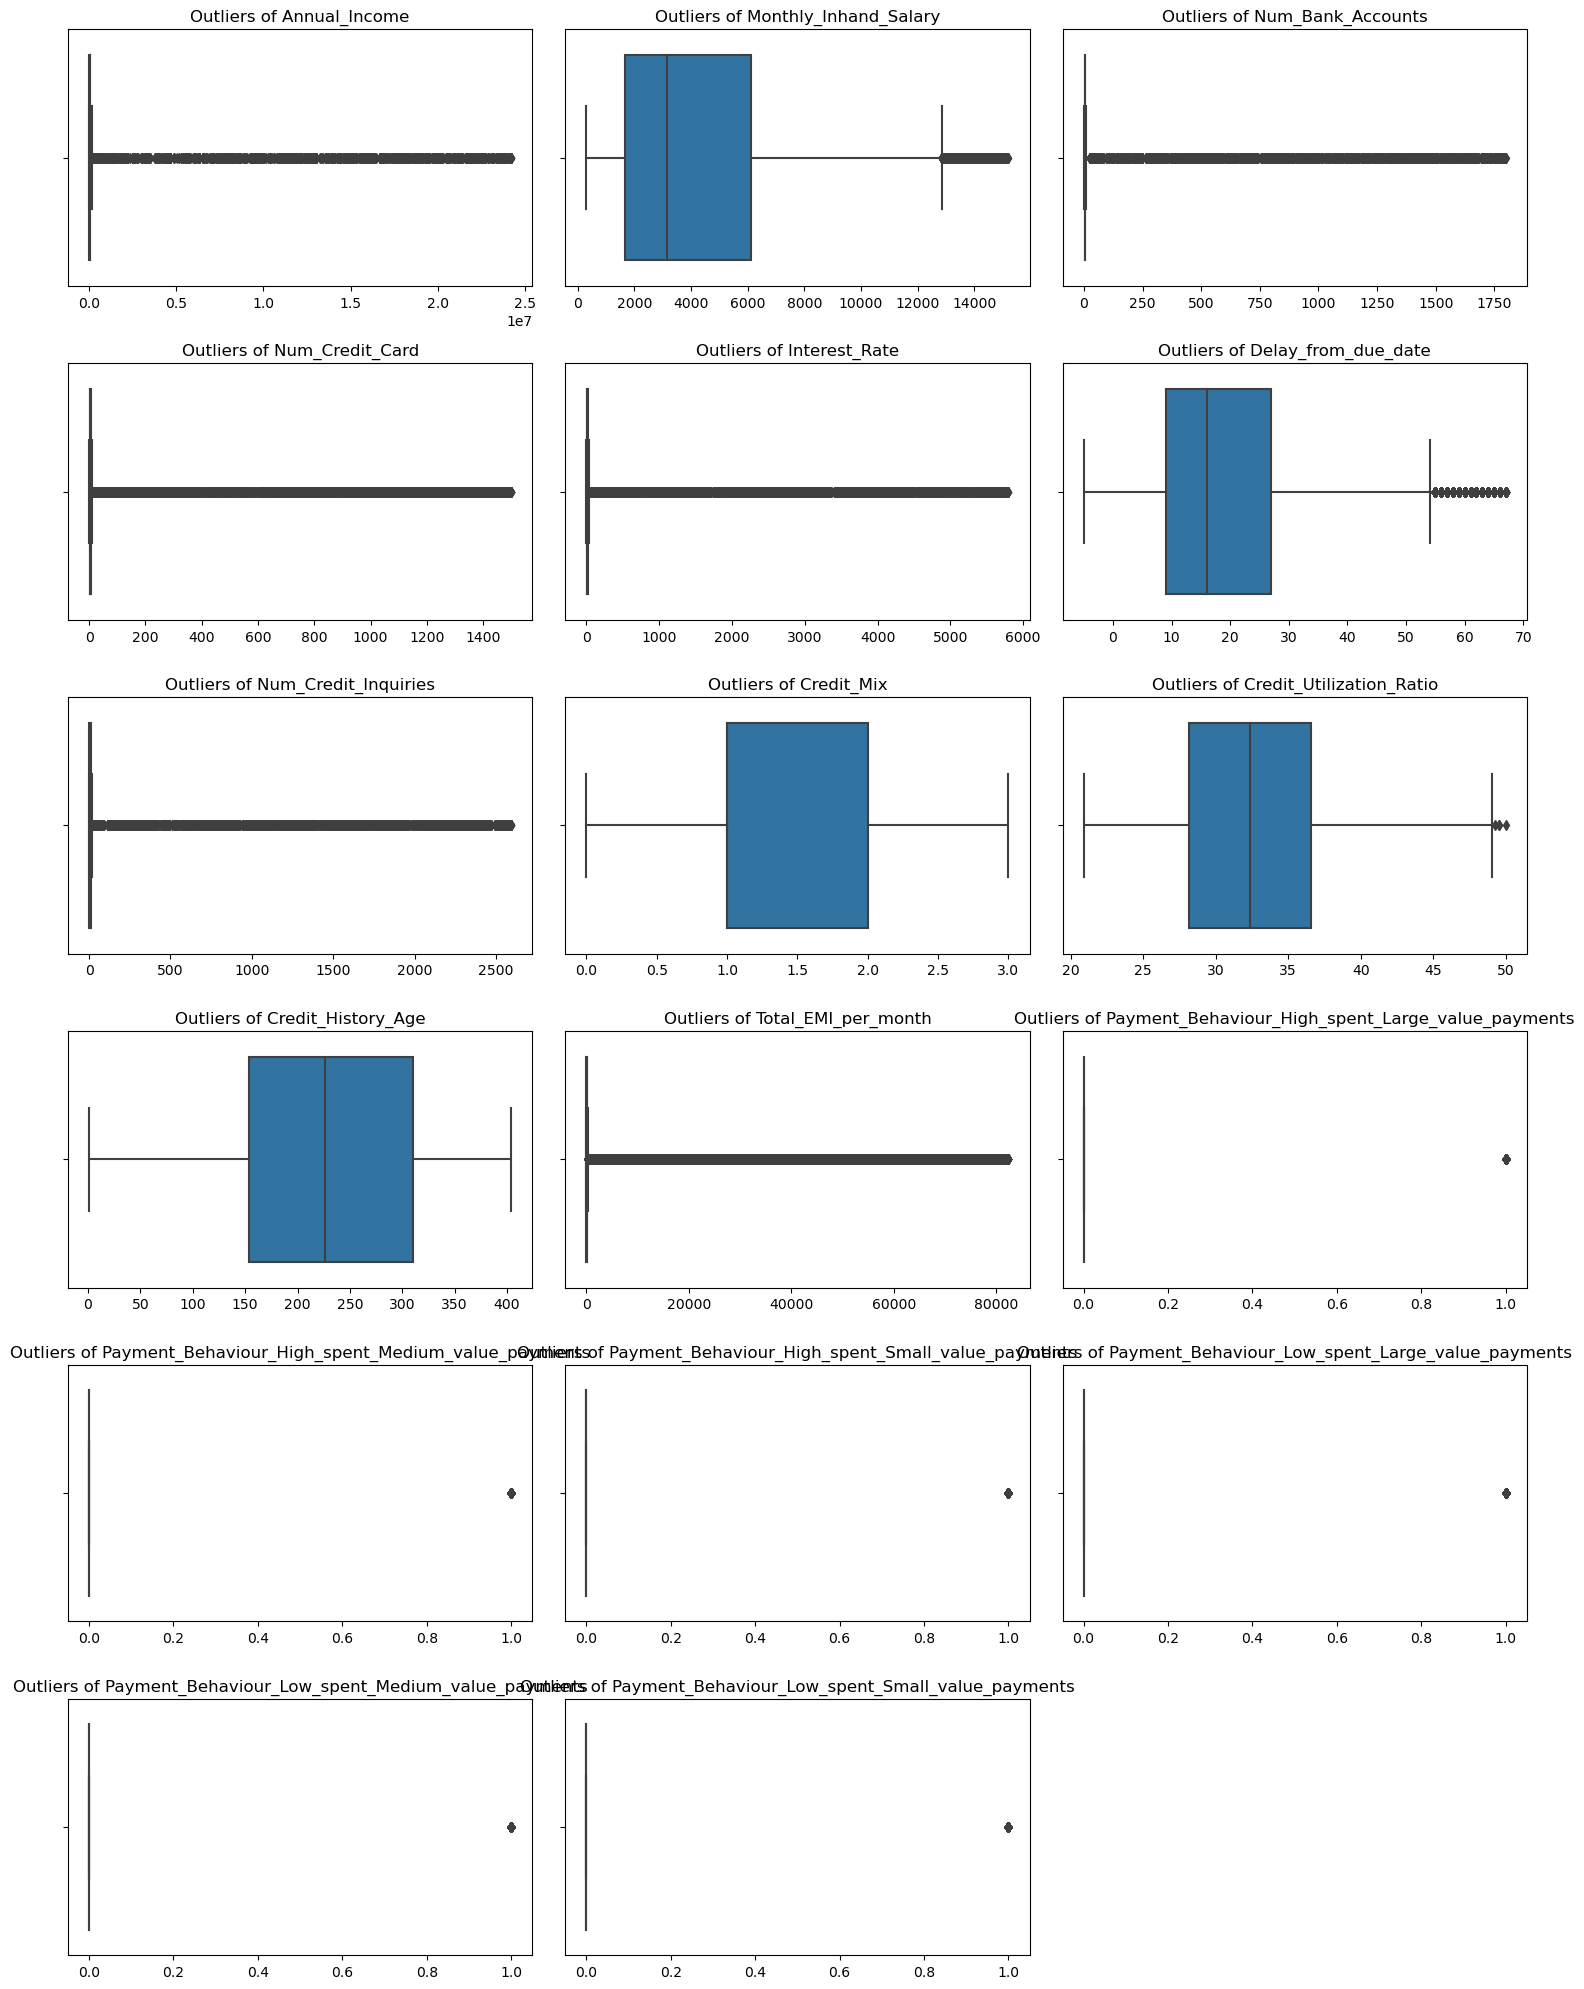

In [44]:
if df.index.duplicated().any():
    print("Duplicate index labels found. Resetting index.")
    df = df.reset_index(drop=True)
else:
  print("No Duplicates")

# Check for NaN or infinite values
if df.index.duplicated().any():
    print("Duplicate index labels found. Resetting index.")
    df = df.reset_index(drop=True)

# Check for NaN or infinite values and ensure all columns are numeric
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(axis=1, how='any')  # Drop columns with any NaN values
df = df.apply(pd.to_numeric, errors='coerce')

# Re-check column count after cleaning
num_cols = 3
num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes
axes = axes.ravel()

i = -1
for feature in df.columns:
    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax=ax)
    ax.set_title(f'Outliers of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove any unused axes
for j in range(i + 1, num_cols * num_rows):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [46]:
data_oversampled = data_oversampled.reset_index(drop=True)
df['Credit_Score'] = data_oversampled['Credit_Score']

In [47]:
data_oversampled.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,NaN,34847.84,3037.986667,2,4,6,1.0,3,4.0,5.42,...,18.816215,104.291825,470.690627,2,0.0,0.0,0.0,0.0,0.0,1.0
1,28.0,34847.84,3037.986667,2,1385,6,1.0,3,1.0,5.42,...,18.816215,58.515976,466.466476,2,1.0,0.0,0.0,0.0,0.0,0.0
2,34.0,143162.64,12187.220000,1,5,8,3.0,8,6.0,7.10,...,246.992319,263.174163,968.555517,2,0.0,0.0,1.0,0.0,0.0,0.0
3,34.0,143162.64,12187.220000,1,5,8,3.0,8,6.0,7.10,...,246.992319,NaN,895.494583,2,0.0,0.0,1.0,0.0,0.0,0.0
4,54.0,30689.89,2612.490833,2,5,4,1.0,0,6.0,1.99,...,16.415452,81.228859,433.604773,2,0.0,0.0,0.0,1.0,0.0,0.0


In [48]:
data_oversampled.isnull().sum()

Age                                                    6524
Annual_Income                                             0
Monthly_Inhand_Salary                                     0
Num_Bank_Accounts                                         0
Num_Credit_Card                                           0
Interest_Rate                                             0
Num_of_Loan                                            6197
Delay_from_due_date                                       0
Num_of_Delayed_Payment                                 3953
Changed_Credit_Limit                                   2760
Num_Credit_Inquiries                                      0
Credit_Mix                                                0
Outstanding_Debt                                       1346
Credit_Utilization_Ratio                                  0
Credit_History_Age                                        0
Payment_of_Min_Amount                                 15722
Total_EMI_per_month                     

In [49]:
data_oversampled_cleaned = data_oversampled.dropna()
data_oversampled_cleaned = data_oversampled_cleaned.reset_index(drop=True)
data_oversampled_cleaned.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,28.0,34847.84,3037.986667,2,1385,6,1.0,3,1.0,5.42,...,18.816215,58.515976,466.466476,2,1.0,0.0,0.0,0.0,0.0,0.0
1,34.0,143162.64,12187.220000,1,5,8,3.0,8,6.0,7.10,...,246.992319,263.174163,968.555517,2,0.0,0.0,1.0,0.0,0.0,0.0
2,54.0,30689.89,2612.490833,2,5,4,1.0,0,6.0,1.99,...,16.415452,81.228859,433.604773,2,0.0,0.0,0.0,1.0,0.0,0.0
3,54.0,30689.89,2612.490833,2,5,4,1.0,5,3.0,1.99,...,16.415452,124.881820,409.951812,2,0.0,0.0,0.0,0.0,0.0,1.0
4,55.0,30689.89,2612.490833,2,5,4,1.0,7,6.0,2.01,...,16.415452,272.334037,262.499594,2,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
data_oversampled_cleaned.isnull().sum()

Age                                                   0
Annual_Income                                         0
Monthly_Inhand_Salary                                 0
Num_Bank_Accounts                                     0
Num_Credit_Card                                       0
Interest_Rate                                         0
Num_of_Loan                                           0
Delay_from_due_date                                   0
Num_of_Delayed_Payment                                0
Changed_Credit_Limit                                  0
Num_Credit_Inquiries                                  0
Credit_Mix                                            0
Outstanding_Debt                                      0
Credit_Utilization_Ratio                              0
Credit_History_Age                                    0
Payment_of_Min_Amount                                 0
Total_EMI_per_month                                   0
Amount_invested_monthly                         

In [51]:
df.isnull().sum()

Annual_Income                                         0
Monthly_Inhand_Salary                                 0
Num_Bank_Accounts                                     0
Num_Credit_Card                                       0
Interest_Rate                                         0
Delay_from_due_date                                   0
Num_Credit_Inquiries                                  0
Credit_Mix                                            0
Credit_Utilization_Ratio                              0
Credit_History_Age                                    0
Total_EMI_per_month                                   0
Payment_Behaviour_High_spent_Large_value_payments     0
Payment_Behaviour_High_spent_Medium_value_payments    0
Payment_Behaviour_High_spent_Small_value_payments     0
Payment_Behaviour_Low_spent_Large_value_payments      0
Payment_Behaviour_Low_spent_Medium_value_payments     0
Payment_Behaviour_Low_spent_Small_value_payments      0
Credit_Score                                    

In [52]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
print(df < (Q1 - 1.5 * IQR) |(df > (Q3 + 1.5 * IQR)))

        Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0               False                  False              False   
1               False                  False              False   
2               False                  False              False   
3               False                  False              False   
4               False                  False              False   
...               ...                    ...                ...   
129983          False                  False              False   
129984          False                  False              False   
129985          False                  False              False   
129986          False                  False              False   
129987          False                  False              False   

        Num_Credit_Card  Interest_Rate  Delay_from_due_date  \
0                 False          False                False   
1                 False          False                False   
2     

Not removing outliers from following features as these might contain important information

In [53]:
# filter out outliers from DataFrame based on the IQR (Interquartile Range) method for specific columns
s = set([
    'Payment_Behaviour_High_spent_Large_value_payments',
    'Payment_Behaviour_High_spent_Medium_value_payments',
    'Payment_Behaviour_High_spent_Small_value_payments',
    'Payment_Behaviour_Low_spent_Large_value_payments',
    'Payment_Behaviour_Low_spent_Medium_value_payments',
    'Payment_Behaviour_Low_spent_Small_value_payments',
    'Payment_of_Min_Amount'
    'Age',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Num_Credit_Inquiries'
])


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for column in df.columns:
    if column in s:
        continue
    df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

print(df)


        Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0            34847.84            3037.986667                  2   
1            34847.84            3037.986667                  2   
2           143162.64           12187.220000                  1   
3           143162.64           12187.220000                  1   
4            30689.89            2612.490833                  2   
...               ...                    ...                ...   
129983       42274.96            3284.913333                  3   
129984      120009.32           10242.776667                  5   
129985       17096.48            1467.706667                  3   
129986       22239.00            1859.250000                  4   
129987      102460.44            8382.370000                  5   

        Num_Credit_Card  Interest_Rate  Delay_from_due_date  \
0                     4              6                    3   
1                  1385              6                    3   
2     

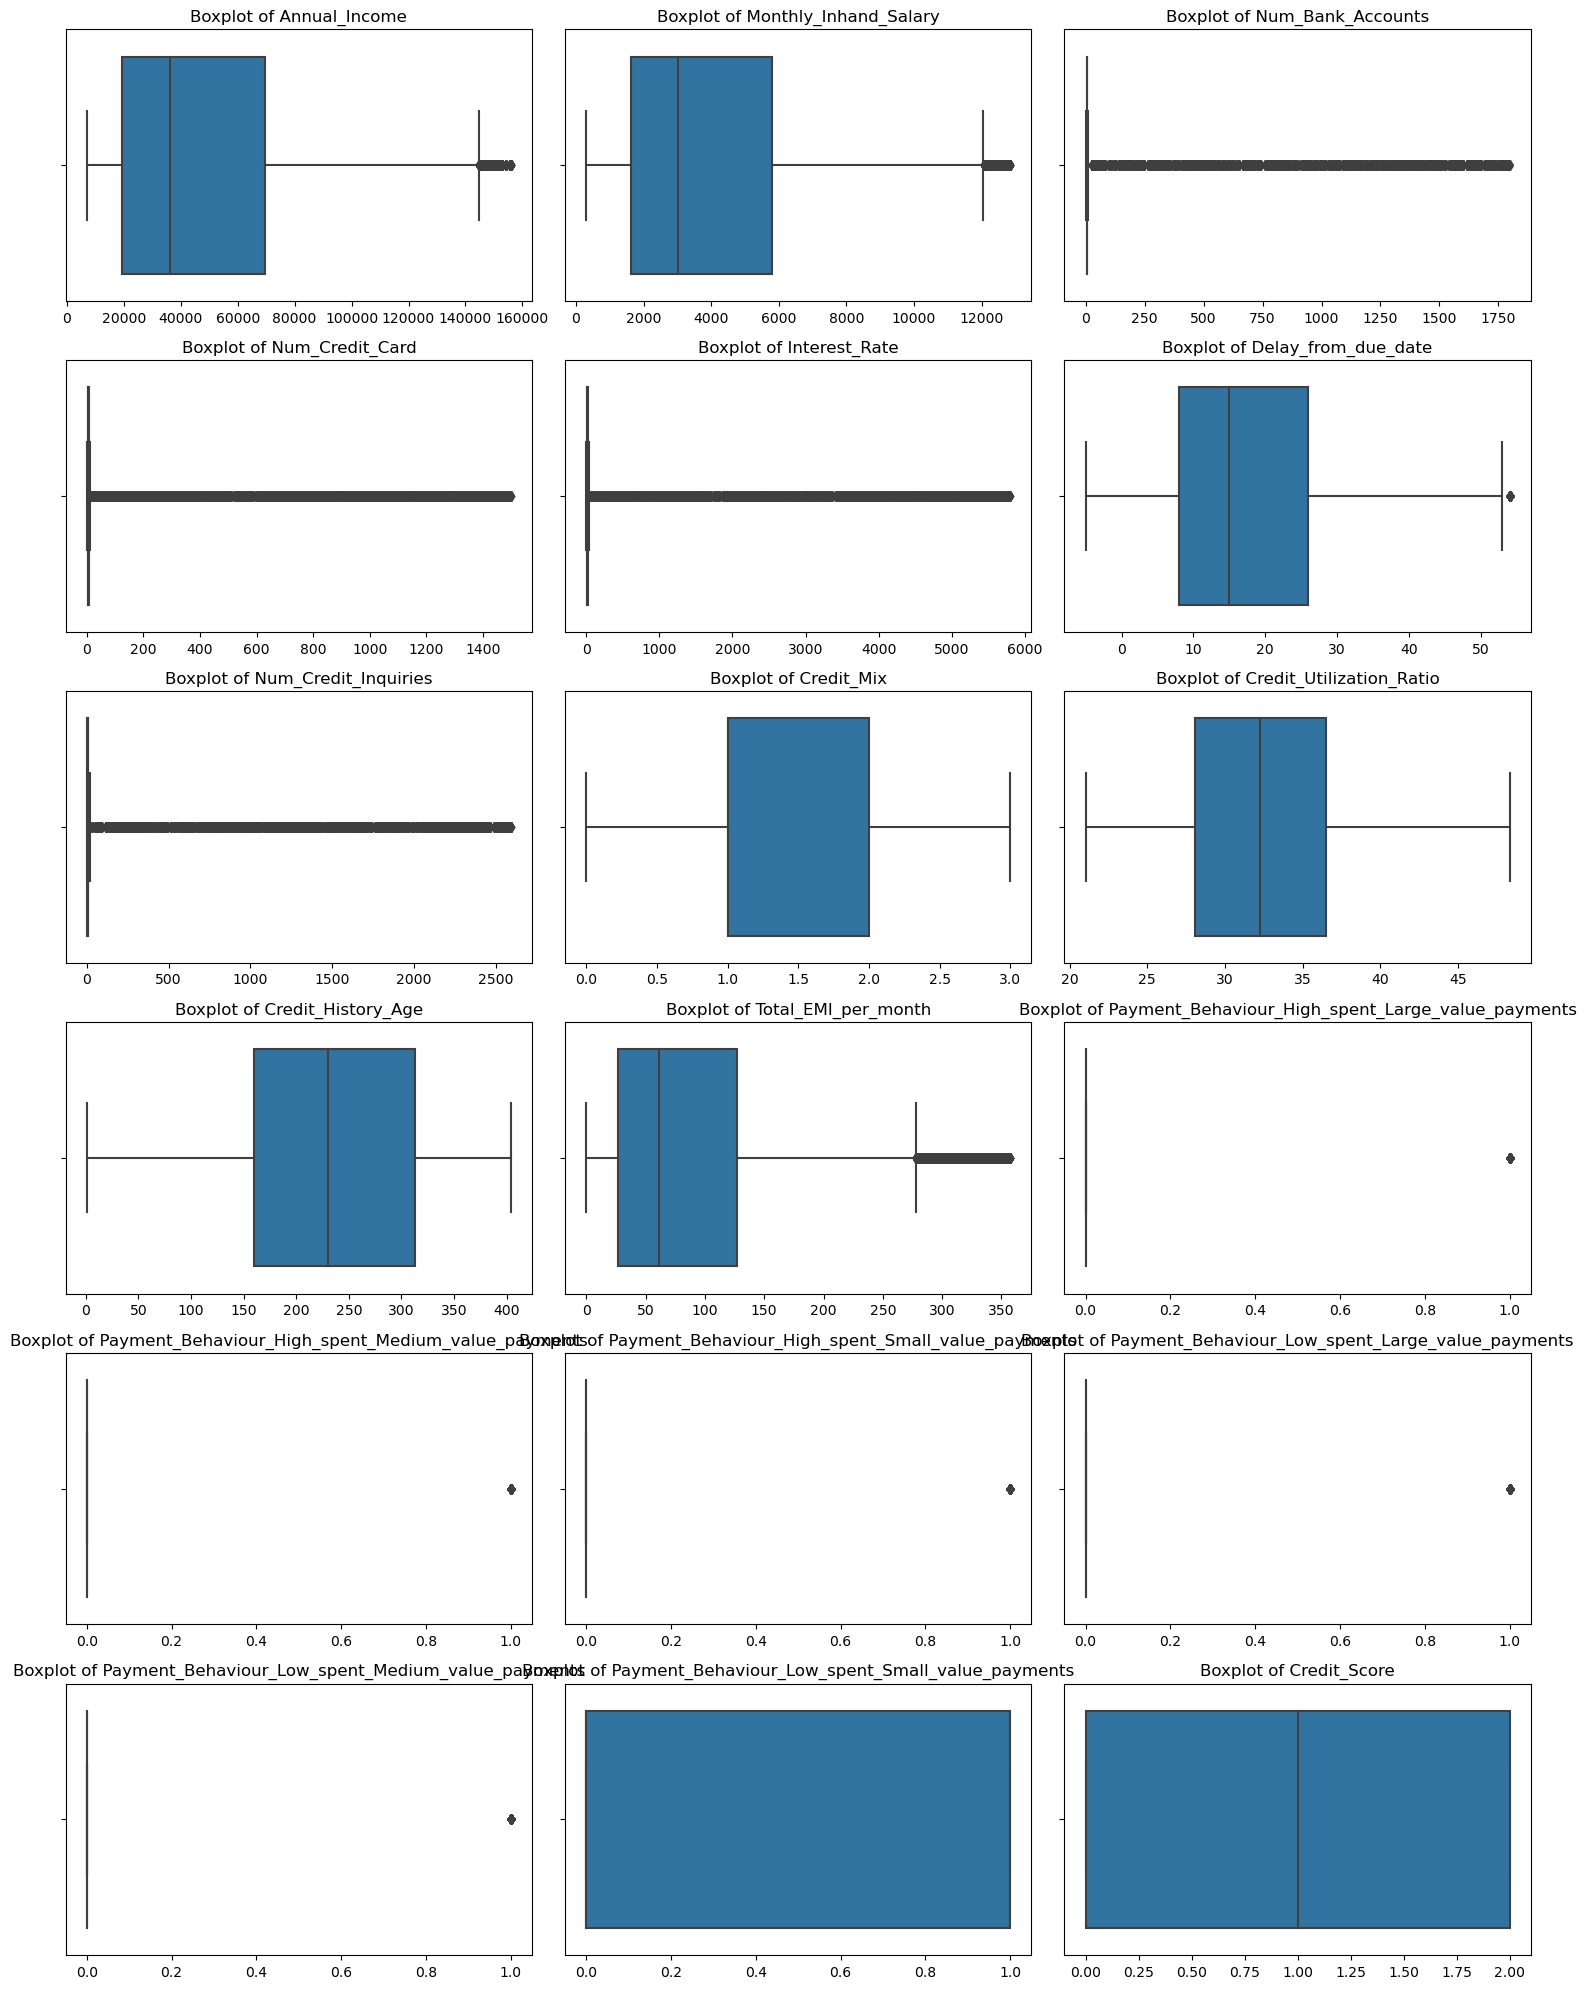

In [54]:
# create a grid of boxplots for each feature in DataFrame after removing outliers
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flattenning the axes
axes = axes.ravel()

i = -1

for feature in df.columns:
    
    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

    
for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

In [55]:
df['Credit_Score'].value_counts()

Credit_Score
0    40596
1    39396
2    31705
Name: count, dtype: int64

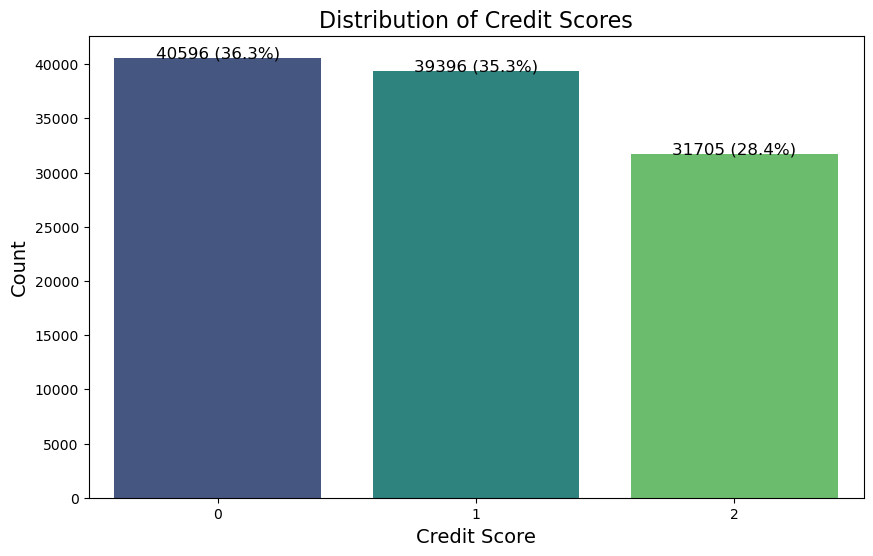

In [56]:
# Calculate value counts and percentages of 'Credit_Score'
credit_score_counts = df['Credit_Score'].value_counts()
credit_score_percentages = df['Credit_Score'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=credit_score_counts.index, y=credit_score_counts.values, palette='viridis')

# Adding titles and labels
plt.title('Distribution of Credit Scores', fontsize=16)
plt.xlabel('Credit Score', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding count and percentage labels on top of the bars
for index, (count, percentage) in enumerate(zip(credit_score_counts.values, credit_score_percentages.values)):
    plt.text(index, count + 5, f'{count} ({percentage:.1f}%)', ha='center', fontsize=12)

plt.show()

In [57]:
# Resetting Index
df.reset_index(drop=True)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Score
0,34847.84,3037.986667,2,4,6,3,2.0,1,24.464031,319,18.816215,0.0,0.0,0.0,0.0,0.0,1.0,2
1,34847.84,3037.986667,2,1385,6,3,2.0,1,33.224951,321,18.816215,1.0,0.0,0.0,0.0,0.0,0.0,2
2,143162.64,12187.220000,1,5,8,8,3.0,1,38.068624,219,246.992319,0.0,0.0,1.0,0.0,0.0,0.0,2
3,143162.64,12187.220000,1,5,8,8,3.0,1,38.374753,220,246.992319,0.0,0.0,1.0,0.0,0.0,0.0,2
4,30689.89,2612.490833,2,5,4,0,4.0,1,26.544229,207,16.415452,0.0,0.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111692,42274.96,3284.913333,3,7,1,12,2.0,1,39.203055,376,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0
111693,120009.32,10242.776667,5,1,7,14,0.0,1,36.410315,349,230.528352,0.0,0.0,0.0,0.0,0.0,0.0,0
111694,17096.48,1467.706667,3,4,5,15,7.0,1,35.495015,259,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0
111695,22239.00,1859.250000,4,5,11,18,1.0,1,34.223166,339,70.173823,0.0,0.0,0.0,0.0,0.0,1.0,0


Text(0.5, 1.0, 'Boxplots for Multiple Columns')

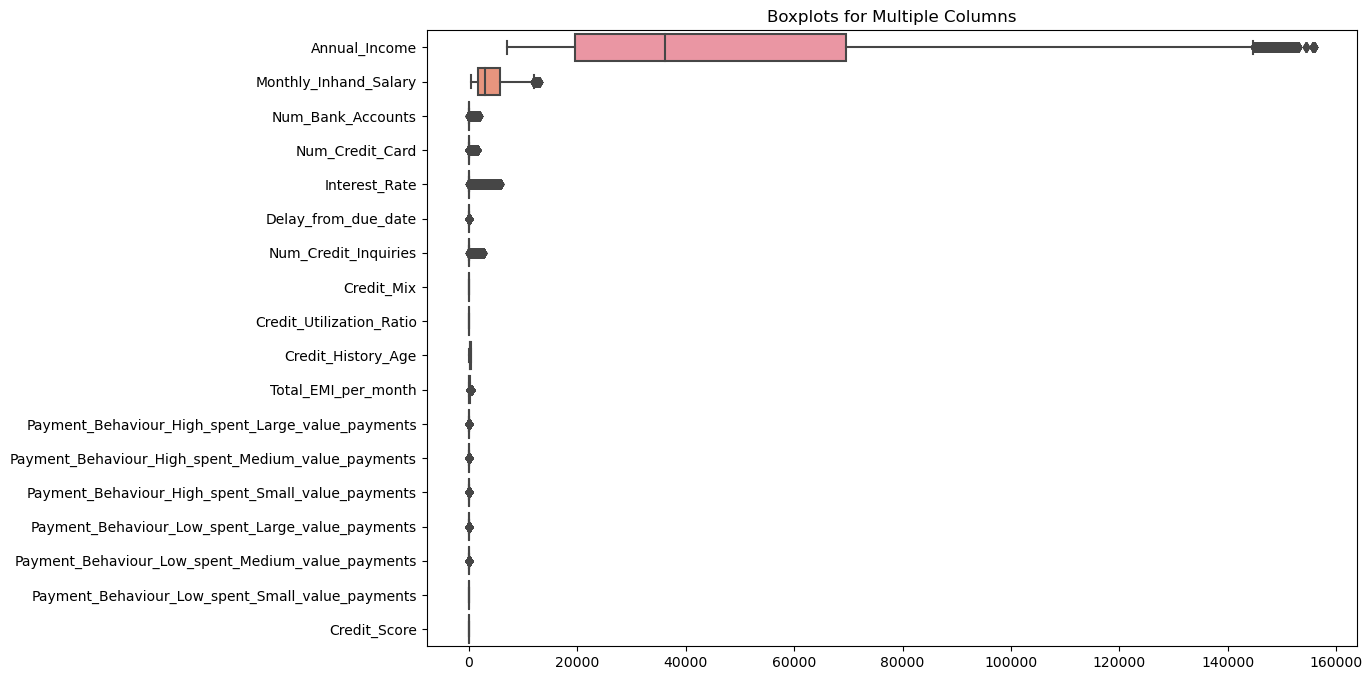

In [58]:
# Use Seaborn to create boxplots for all columns in df
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')  
plt.title('Boxplots for Multiple Columns')

Feature Scaling

In [59]:
df_without_outliers = df.copy()

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

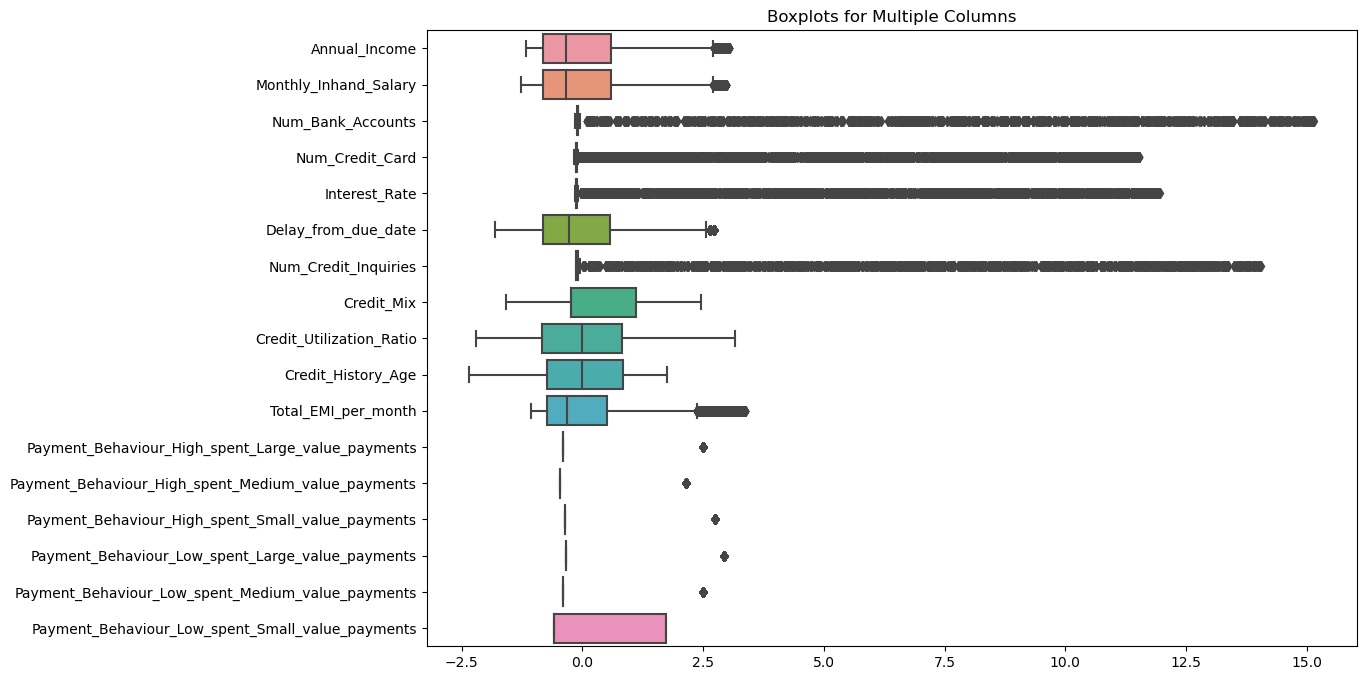

In [60]:
# Use Seaborn to create boxplots for all columns in df
sc = StandardScaler()
sc.fit(df_without_outliers.drop('Credit_Score', axis = 1))
df_final_without_outliers = sc.transform(df_without_outliers.drop('Credit_Score', axis = 1))
df_final_without_outliers = pd.DataFrame(df_final_without_outliers, columns = df_without_outliers.drop('Credit_Score', axis = 1).columns)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=df_final_without_outliers, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

In [61]:
df_final_without_outliers=  pd.DataFrame(df_final_without_outliers, columns=df_without_outliers.columns.difference(['Credit_Score']))

In [62]:
df_final_without_outliers['Credit_Score'] = df_without_outliers.reset_index()['Credit_Score']

In [63]:

df_final_without_outliers

,Annual_Income,Credit_History_Age,Credit_Mix,Credit_Utilization_Ratio,Delay_from_due_date,Interest_Rate,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_Credit_Inquiries,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Total_EMI_per_month,Credit_Score
0,-0.383437,0.892689,-0.227641,-1.532110,-1.191524,-0.141879,-0.336959,-0.125700,-0.141798,-0.126427,-0.400474,-0.464716,-0.363843,-0.341045,-0.398878,1.728018,-0.838395,2
1,-0.383437,0.913085,-0.227641,0.189103,-1.191524,-0.141879,-0.336959,-0.125700,10.646940,-0.126427,2.497038,-0.464716,-0.363843,-0.341045,-0.398878,-0.578698,-0.838395,2
2,2.671847,-0.127111,-0.227641,1.140715,-0.807697,-0.137700,2.753296,-0.134210,-0.133986,-0.120957,-0.400474,-0.464716,2.748438,-0.341045,-0.398878,-0.578698,1.993548,2
3,2.671847,-0.116913,-0.227641,1.200858,-0.807697,-0.137700,2.753296,-0.134210,-0.133986,-0.120957,-0.400474,-0.464716,2.748438,-0.341045,-0.398878,-0.578698,1.993548,2
4,-0.500722,-0.249487,-0.227641,-1.123424,-1.421820,-0.146058,-0.480675,-0.125700,-0.133986,-0.115486,-0.400474,-0.464716,-0.363843,2.932168,-0.398878,-0.578698,-0.868192,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111692,-0.173937,1.473975,-0.227641,1.363590,-0.500636,-0.152327,-0.253557,-0.117190,-0.118361,-0.126427,-0.400474,-0.464716,2.748438,-0.341045,-0.398878,-0.578698,-1.071927,0
111693,2.018751,1.198629,-0.227641,0.814915,-0.347105,-0.139789,2.096538,-0.100169,-0.165235,-0.137369,-0.400474,-0.464716,-0.363843,-0.341045,-0.398878,-0.578698,1.789210,0
111694,-0.884158,0.280809,-0.227641,0.635091,-0.270339,-0.143968,-0.867339,-0.117190,-0.141798,-0.099073,-0.400474,-0.464716,-0.363843,2.932168,-0.398878,-0.578698,-1.071927,0
111695,-0.739100,1.096649,-0.227641,0.385217,-0.040043,-0.131431,-0.735091,-0.108679,-0.133986,-0.131898,-0.400474,-0.464716,-0.363843,-0.341045,-0.398878,1.728018,-0.200985,0


In [66]:
# Exporting df in form of csv
df_final_without_outliers.to_csv('df_finalclean.csv', index=False)